In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#men_shoes = pd.read_csv('https://query.data.world/s/ucsj2mwxtt2inakri3735mtudy7u25')
men_shoes = pd.read_csv('https://query.data.world/s/pdrdhwroyttal27dkimuyiy5qvmtdn', low_memory = False, error_bad_lines=False)

#women_shoes = pd.read_csv('7210_1.csv', low_memory=False)
#women_shoes_test = df = pd.read_csv('https://query.data.world/s/geopno3aqt6j2hih4n4ryo34j3vktt', low_memory=False) # Women Shoes jun_19

b'Skipping line 251: expected 48 fields, saw 49\nSkipping line 444: expected 48 fields, saw 50\nSkipping line 847: expected 48 fields, saw 49\nSkipping line 848: expected 48 fields, saw 49\nSkipping line 1018: expected 48 fields, saw 49\nSkipping line 1575: expected 48 fields, saw 51\nSkipping line 2133: expected 48 fields, saw 49\nSkipping line 2922: expected 48 fields, saw 51\nSkipping line 3777: expected 48 fields, saw 51\nSkipping line 4057: expected 48 fields, saw 49\nSkipping line 4239: expected 48 fields, saw 49\nSkipping line 4240: expected 48 fields, saw 49\nSkipping line 4384: expected 48 fields, saw 49\nSkipping line 4385: expected 48 fields, saw 49\nSkipping line 5388: expected 48 fields, saw 49\nSkipping line 5480: expected 48 fields, saw 49\nSkipping line 5481: expected 48 fields, saw 49\nSkipping line 5907: expected 48 fields, saw 50\nSkipping line 5908: expected 48 fields, saw 50\nSkipping line 6600: expected 48 fields, saw 49\nSkipping line 6601: expected 48 fields, sa

In [ ]:
men_shoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19315 entries, 0 to 19314
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   19315 non-null  object 
 1   asins                2571 non-null   object 
 2   brand                19057 non-null  object 
 3   categories           19315 non-null  object 
 4   colors               11013 non-null  object 
 5   count                0 non-null      float64
 6   dateAdded            19315 non-null  object 
 7   dateUpdated          19315 non-null  object 
 8   descriptions         9841 non-null   object 
 9   dimension            2991 non-null   object 
 10  ean                  9963 non-null   float64
 11  features             13925 non-null  object 
 12  flavors              0 non-null      float64
 13  imageURLs            18271 non-null  object 
 14  isbn                 0 non-null      float64
 15  keys                 19315 non-null 

In [ ]:
men_shoes.head()

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,ean,features,flavors,imageURLs,isbn,keys,manufacturer,manufacturerNumber,merchants,name,prices.amountMin,prices.amountMax,prices.availability,prices.color,prices.condition,prices.count,prices.currency,prices.dateAdded,prices.dateSeen,prices.flavor,prices.isSale,prices.merchant,prices.offer,prices.returnPolicy,prices.shipping,prices.size,prices.source,prices.sourceURLs,prices.warranty,quantities,reviews,sizes,skus,sourceURLs,upc,vin,websiteIDs,weight
0,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/13ac3d61-003c...,NaN,"josmo/8190wnavy75,699302044036,0699302044036",NaN,8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, Navy - ...",39.89,39.89,NaN,NaN,NaN,NaN,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,NaN,true,NaN,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,NaN,NaN,NaN
1,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/13ac3d61-003c...,NaN,"josmo/8190wnavy75,699302044036,0699302044036",NaN,8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, Navy - ...",51.99,51.99,NaN,NaN,new,NaN,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,NaN,false,UnbeatableSale - Walmart.com,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,NaN,NaN,NaN
2,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",Servus By Honeywell Shoe Studs Zsr101blmlg,40.02,40.02,NaN,NaN,new,NaN,USD,2016-06-14T04:29:57Z,2016-03-08T00:00:00Z,NaN,false,SIM Supply Inc - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
3,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",Servus By Honeywell Shoe Studs Zsr101blmlg,50.31,50.31,NaN,NaN,new,NaN,USD,2016-06-14T04:29:57Z,2015-11-30T00:00:00Z,NaN,false,SIM Supply Inc - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
4,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:5

In [ ]:
men_shoes.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateAdded',
       'dateUpdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageURLs', 'isbn', 'keys', 'manufacturer',
       'manufacturerNumber', 'merchants', 'name', 'prices.amountMin',
       'prices.amountMax', 'prices.availability', 'prices.color',
       'prices.condition', 'prices.count', 'prices.currency',
       'prices.dateAdded', 'prices.dateSeen', 'prices.flavor', 'prices.isSale',
       'prices.merchant', 'prices.offer', 'prices.returnPolicy',
       'prices.shipping', 'prices.size', 'prices.source', 'prices.sourceURLs',
       'prices.warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceURLs', 'upc', 'vin', 'websiteIDs', 'weight'],
      dtype='object')

In [ ]:
men_shoes.shape

(19315, 48)

In [ ]:
data = men_shoes

In [ ]:
# Changing headers to lowercase
data.columns= map(str.lower, data.columns)

In [ ]:
data_null_table_df = pd.DataFrame(data.isnull().sum(axis=0),columns=['num_nulls'])

In [ ]:
data_null_table_df['feature_name'] = data_null_table_df.index
data_null_table_df['ratio_of_null'] = data_null_table_df['num_nulls']/data.shape[0]

In [ ]:
data_null_table_df.head(5)

,num_nulls,feature_name,ratio_of_null
id,0,id,0.000000
asins,16744,asins,0.866891
brand,258,brand,0.013357
categories,0,categories,0.000000
colors,8302,colors,0.429821


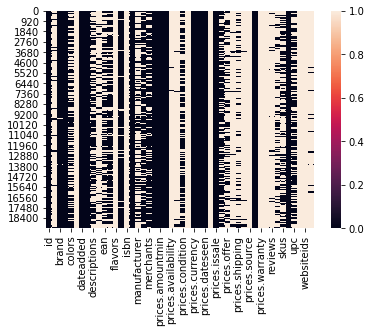

In [ ]:
import seaborn as sns
sns.heatmap(data.isnull().astype('int'))

In [ ]:
threshold = 0.5
col2remove = data_null_table_df[data_null_table_df['ratio_of_null'] > threshold].index
col2remove

Index(['asins', 'count', 'dimension', 'flavors', 'isbn', 'manufacturer',
       'prices.availability', 'prices.color', 'prices.count', 'prices.flavor',
       'prices.offer', 'prices.returnpolicy', 'prices.shipping', 'prices.size',
       'prices.source', 'prices.warranty', 'quantities', 'reviews', 'sizes',
       'skus', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [ ]:
data_after_remove_df = data[[col for col in data.columns if col not in col2remove]]

In [ ]:
print("The data shape before %s and after %s "%(data.shape, data_after_remove_df.shape))

The data shape before (19315, 48) and after (19315, 25) 


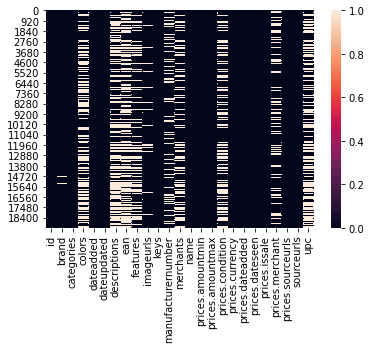

In [ ]:
sns.heatmap(data_after_remove_df.isnull().astype('int'))

In [ ]:
data = data_after_remove_df
#Dealing with the NaN
print("Null values per column:")
data.isnull().sum()

Null values per column:


id                       0
brand                  258
categories               0
colors                8302
dateadded                0
dateupdated              0
descriptions          9474
ean                   9352
features              5390
imageurls             1044
keys                     0
manufacturernumber    4228
merchants             5347
name                     0
prices.amountmin        10
prices.amountmax         0
prices.condition      6703
prices.currency         11
prices.dateadded         4
prices.dateseen         20
prices.issale           10
prices.merchant       5537
prices.sourceurls       15
sourceurls              21
upc                   8559
dtype: int64

In [ ]:
# Auxiliary methods

def get_review_texts(el):
    try:
        dict_review = json.loads(el)
        return " ENDMSG ".join(map(lambda rev: rev.get("text", ""), dict_review))
    except (TypeError, json.JSONDecodeError, KeyError) as e:
        return np.nan

def get_review_ratings(el):
    try:
        dict_review = json.loads(el)
        reviews_list = list(map(lambda rev: rev.get("rating", np.nan), dict_review))
        if all(np.isnan(reviews_list)):
            return np.nan
        return reviews_list
    except (TypeError, json.JSONDecodeError, KeyError) as e:
        return np.nan

def clean_merchant(el):
    try:
        if ".com" in el and " " in el:
            return el[::-1][:el[::-1].find(" ")][::-1].lower()
        return el.lower()
    except TypeError:
        return np.nan

In [ ]:
# Changing headers to lowercase
data.columns= map(str.lower, data.columns)

In [ ]:
data['colors2'] = data['features'].str.split('"key":"Color","value":\["',
                                         expand=True)[1].str.split('"\]}',
                                                                   expand=True, n=1)[0]
data['colors'] = data['colors'].fillna(data['colors2'])
data.drop('colors2', axis=1, inplace=True)
data['colors'] = data['colors'].str.lower()
data['colors'].isnull().sum()/33798*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

15.790875199715959

In [ ]:
data['colors'] = data['colors'].fillna('no color')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data['brand'] = data['brand'].fillna('no brand')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# brand names to change.

brand_map = {'a2 by aerosoles':'aerosoles', "what's what by aerosoles":'aerosoles',
'adidas outdoor':'adidas',
'adriana new york':'adriana',
'alexander mcqueen by puma':'puma', 'alexander mcqueen':'puma',
'alpine':'alpine swiss',
'anne klein ak':'anne klein', 'anne klein sport':'anne klein',
'annie shoes':'annie',
'athena':'athena alexander',
'babe.':'babe',
'baretraps':'bare traps',
'bcbg max azria':'bcbg', 'bcbg paris':'bcbg', 'bcbgeneration':'bcbg',
'beacon shoes':'beacon',
'bebe sport':'bebe', 'bebe stu':'bebe',
'belle by sigerson morrison':'belle', 'belle sigerson morrison':'belle',
'bernie mev':'bernie', 'bernie mev.':'bernie',
'bettye by bettye muller':'bettye muller', 'bettye by bettye muller ':'bettye muller',
"breckelle's":'breckelles',
'callaway footwear':'callaway',
'calvin klein ck':'calvin klein', 'calvin klein jeans':'calvin klein',
'carlos by carlos santana':'carlos santana',
'charles by charles david':'charels david',
'see by chloe':'chloe',
'clarks artisan':'clarks', 'clarks artisan collection':'clarks', 'clarks collection':'clarks',
'cobb hill by new balance':'new balance', 'cobb hill':'new balance',
'maria sharapova by cole haan': 'cole hann',
"corky's":'corkys', "corky's footwear":'corkys', "corkys footwear, inc.":'corkys',
'dearforms':'dearfoams', 'df by dearfoams':'dearfoams',
'derek lam 10 crosby':'derek lam',
'diba.true':'dibatrue',
'dolce&gabbana':'dolce and gabbana', 'dolce & gabbana':'dolce and gabbana', 'dolce by mojo moxy':'dolce and gabbana',
  'dolce vita':'dolce and gabbana', 'dv8 by dolce vita':'dolce and gabbana', 'dv by dolce vita':'dolce and gabbana',
"dr. scholl's":'dr scholls',
"dr. martens air wair":'drmartens',
'drew shoe':'drew',
'easy spirit e360':'easy spirit', 'easy spirit.':'easy spirit',
'ellie shoes':'ellie',
'emu australia':'emu',
'fergie footwear':'fergie',
'forever collectible':'forever', 'forever link':'forever', 'fourever funky':'forever',
'sarto by franco sarto':'franco sarto',
'ferriniusa':'ferrini',
'fitflop':'fit flop',
'funtasma by pleaser':'funtasma',
'g by guess':'guess',
'gc shoes':'gc',
'genuine grip footwear':'genuine grip',
"hogan by tod's":'hogan',
'soft style by hush puppies':'hush puppies',
'ilse jacobsen hornbaek':'ilse jacobson',
'isaacmizrahi':'isaac mizrahi',
'italian shoe makers':'italian comfort',
'j.renee':'j. renee',
'jbu by jambu':'jambu',
'josefseibel':'josef siebel',
'justin blair':'justin', 'justin boots':'justin', 'justin gypsy':'justin',
'kate spade new york':'kate spade',
'kenneth cole reaction':'kenneth cole', 'kenneth cole ny':'kenneth cole', 'kenneth cole new york':'kenneth cole',
 'unlisted kenneth cole':'kenneth cole',
'lamo sheepskin inc':'lamo',
'lifestride':'lifes tride',
'luoluo':'luo luo',
'marc fisher ltd':'marc fisher',
'mia heritage':'mia',
'micahel kors':'michael kors', 'michael michael kors':'michael kors',
'mobils by mephisto':'mephisto',
'top moda':'moda', 'moda essentials':'moda', 'everybody by bz moda':'moda',
'muk luks a la mode':'muk luks',
'munro american':'munro',
'naot footwear':'naot',
'new@titude':'new attitude', 'new@ttitude':'new attitude',
'nina originals':'nina',
'nine west vintage america collection':'nine west',
'nufoot���':'nufoot',
'pleaser shoes':'pleaser', 'pleaser usa, inc.':'pleaser', 'pleaserusa':'pleaser',
'rachel':'rachel roy', 'rachel rachel roy ':'rachel roy',
'lauren by ralph lauren':'ralph lauren', 'lauren ralph lauren':'ralph lauren', 'lauren lorraine':'ralph lauren',
 'polo ralph lauren':'ralph lauren','ralph lauren denim supply':'ralph lauren',
'rieker-antistress':'rieker',
'rocket dog brands llc':'rocket dog',
'sanita clogs':'sanita',
'ferragamo':'salvatore ferragamo',
'skechers usa':'skechers',
'sperry top sider':'sperry', 'sperry top-sider':'sperry',
"l'artiste by spring step":'spring step', "flexus by spring step":'spring step', "patrizia by spring step ":'spring step',
 "patrizia pepe":'spring step', "patrizia":'spring step',
'steven steve madden':'steve madden',
'style & co.':'style and co',
'timberland earthkeepers':'timberland', 'timberland pro':'timberland',
'toms shoes':'toms',
'tony lama boot co.':'tony lama',
'totes isotoner':'totes',
'trotter':'trotters',
'ugg australia':'ugg',
'famous name brand':'unbranded', 'generic':'unbranded', 'generic surplus':'unbranded', 'non-branded':'unbranded',
 'not applicable':'unbranded', 'not rated':'unbranded', 'lucky  brand':'unbranded', 'lucky brand':'unbranded',
 'very fine dance shoes':'unbranded',
'valentino noir':'valentino',
'victoria k.':'victoria',
'vince camuto':'vince',
'vionic by orthaheel':'vionic', 'vionic with orthaheel technology':'vionic',
'elites by walking cradles':'walking cradles', 'elites':'walking cradles','mark lemp by walking cradles':'walking cradles',
 'rose petals by walking cradles':'walking cradles', 'the walking cradle company':'walking cradles'
}

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19315 entries, 0 to 19314
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19315 non-null  object 
 1   brand               19315 non-null  object 
 2   categories          19315 non-null  object 
 3   colors              19315 non-null  object 
 4   dateadded           19315 non-null  object 
 5   dateupdated         19315 non-null  object 
 6   descriptions        9841 non-null   object 
 7   ean                 9963 non-null   float64
 8   features            13925 non-null  object 
 9   imageurls           18271 non-null  object 
 10  keys                19315 non-null  object 
 11  manufacturernumber  15087 non-null  object 
 12  merchants           13968 non-null  object 
 13  name                19315 non-null  object 
 14  prices.amountmin    19305 non-null  object 
 15  prices.amountmax    19315 non-null  object 
 16  pric

In [ ]:
# create a new column with corrected brand names.

data['brand_clean'] = data['brand'].replace(brand_map)
data['brand_clean'].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0                  Josmo
1                  Josmo
2    SERVUS BY HONEYWELL
3    SERVUS BY HONEYWELL
4    SERVUS BY HONEYWELL
Name: brand_clean, dtype: object

In [ ]:
del_brand = ['1 world sarongs', 'mirage pet products', 'timeless toys'] # to delete
data = data[~data['brand'].isin(del_brand)]

In [ ]:
#data.groupby('brand')['prices.amountmax'].mean().sort_values(ascending=False).head(10)

In [ ]:
data = data[~(data['brand']=='jewelsobsession')]

In [ ]:
#Average price of shoes
data['prices.amountmin'] = pd.to_numeric(data['prices.amountmin'], errors='coerce')
data['prices.amountmax'] = pd.to_numeric(data['prices.amountmax'], errors='coerce')
data['prices.amountavg']= (data['prices.amountmin']+ data['prices.amountmax'])/2
print(data['prices.amountavg'].head(15))

0     39.89
1     51.99
2     40.02
3     50.31
4     46.26
5     55.99
6     41.12
7     46.19
8     21.40
9     45.23
10    45.00
11     7.99
12     9.99
13     9.99
14    19.99
Name: prices.amountavg, dtype: float64


In [ ]:
data[['prices.amountmin','prices.amountavg','prices.amountmax']].describe()

,prices.amountmin,prices.amountavg,prices.amountmax
count,19294.000000,19294.000000,19294.000000
mean,111.952238,113.294337,114.636435
std,277.341694,277.613055,278.526126
min,0.000000,0.000000,0.000000
25%,35.000000,35.582500,35.950000
50%,65.000000,65.000000,65.245000
75%,117.000000,119.950000,119.990000
max,16949.000000,16949.000000,16949.000000


In [ ]:
data = data.drop(['descriptions', 'imageurls', 'sourceurls', 'manufacturernumber', 'prices.sourceurls'], axis = 1)

In [ ]:
data.columns

Index(['id', 'brand', 'categories', 'colors', 'dateadded', 'dateupdated',
       'ean', 'features', 'keys', 'merchants', 'name', 'prices.amountmin',
       'prices.amountmax', 'prices.condition', 'prices.currency',
       'prices.dateadded', 'prices.dateseen', 'prices.issale',
       'prices.merchant', 'upc', 'brand_clean', 'prices.amountavg'],
      dtype='object')

In [ ]:
data.head().T

,0,1,2,3,4
id,AVpfHrJ6ilAPnD_xVXOI,AVpfHrJ6ilAPnD_xVXOI,AVpfHsWP1cnluZ0-eVZ7,AVpfHsWP1cnluZ0-eVZ7,AVpfHsWP1cnluZ0-eVZ7
brand,Josmo,Josmo,SERVUS BY HONEYWELL,SERVUS BY HONEYWELL,SERVUS BY HONEYWELL
categories,"Clothing,Shoes,Men's Shoes,All Men's Shoes","Clothing,Shoes,Men's Shoes,All Men's Shoes","All Men's Shoes,Shoes,Men's Shoes,Clothing","All Men's Shoes,Shoes,Men's Shoes,Clothing","All Men's Shoes,Shoes,Men's Shoes,Clothing"
colors,multicolor,multicolor,black,black,black
dateadded,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,2016-06-14T04:29:57Z,2016-06-14T04:29:57Z,2016-06-14T04:29:57Z
dateupdated,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,2016-07-09T20:26:48Z,2016-07-09T20:26:48Z,2016-07-09T20:26:48Z
ean,6.99302e+11,6.99302e+11,NaN,NaN,NaN
features,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...","[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...","[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...","[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...","[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo..."
keys,"josmo/8190wnavy75,699302044036,0699302044036","josmo/8190wnavy75,699302044036,0699302044036",servusbyhoneywell/zsr101blmlg,servusbyhoneywell/zsr101blmlg,servusbyhoneywell/zsr101blmlg
merchants,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...","[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...","[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""..."


In [ ]:
data.shape

(19315, 22)

In [ ]:
# Checking the currency 
data['prices.currency'].value_counts()

USD                                                   18524
AUD                                                     338
CAD                                                     303
EUR                                                     107
GBP                                                      22
PalmBeach Jewelry - Walmart.com                           3
UnbeatableSale.com, Inc. - Walmart.com                    3
Wholesale Costume and Party Supplies - Walmart.com        2
SHOEBACCA LTD. - Walmart.com                              1
Shoes.com                                                 1
Name: prices.currency, dtype: int64

In [ ]:
data= data[data['prices.currency']=='USD']
data['prices.currency'].value_counts()

USD    18524
Name: prices.currency, dtype: int64

In [ ]:
data = data[data['prices.amountmin'] > 0.000]
data['prices.amountavg'].describe()

count    18521.000000
mean       113.656821
std        282.600901
min          0.010000
25%         35.850000
50%         65.000000
75%        117.530000
max      16949.000000
Name: prices.amountavg, dtype: float64

In [ ]:
d2 = data['prices.amountavg'].value_counts().sort_values(ascending=False)

In [ ]:
data['prices.amountmax'].describe()

count    18521.000000
mean       114.929012
std        283.096976
min          0.010000
25%         35.990000
50%         65.000000
75%        119.950000
max      16949.000000
Name: prices.amountmax, dtype: float64

In [ ]:
from scipy.stats import binned_statistic
bin_means = binned_statistic(data['prices.amountavg'], data['prices.amountavg'], bins=10)[0]

In [ ]:
d2 = data[data['prices.amountavg']> 5000]
d2['prices.amountavg'] == True

300      False
12423    False
12424    False
16002    False
16003    False
16004    False
16005    False
Name: prices.amountavg, dtype: bool

The average shoe price is 115 dollars, the median 65 


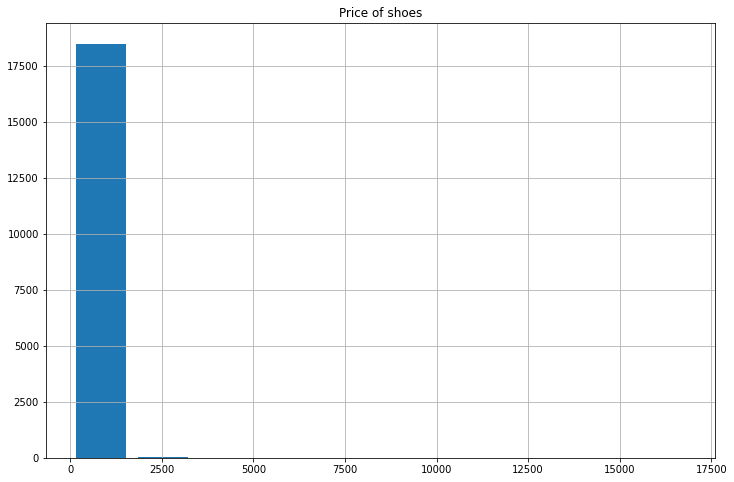

In [ ]:
# How expensive are shoes
print('The average shoe price is {:,.0f} dollars, the median {:,.0f} '.format(
    data['prices.amountmax'].mean(), data['prices.amountmax'].median()))

data['prices.amountmax'].hist(bins=10, rwidth=.8, figsize=(12,8))
plt.title('Price of shoes')
plt.show()

(array([1.6968e+04, 1.1400e+03, 1.4700e+02, 1.1000e+02, 1.8000e+01,
        6.8000e+01, 4.3000e+01, 4.0000e+00, 1.1000e+01, 1.0000e+00]),
 array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250., 2500.]),
 <a list of 10 Patch objects>)

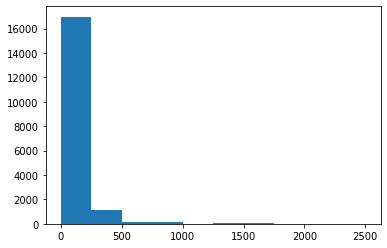

In [ ]:
plt.hist(data['prices.amountmax'], bins = 10, range=(0,2500))

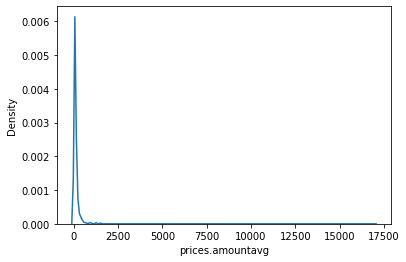

In [ ]:
sns.kdeplot(data['prices.amountavg'])

In [ ]:
# Checking the brand names and their value counts 
data.groupby(['brand']).size().head(15)

brand
1031                    1
12 Step Gold            2
14k co.                36
180s                    4
1883 by Wolverine       1
1901                    1
20-001707000            3
29 Porter Rd           10
2Bhip                  16
32 Degrees              6
32north/Stabilicers     3
361 Degrees             2
3M (formerly Aearo)     2
3N2                    23
3N2 Sports             11
dtype: int64

In [ ]:
data.dtypes

id                   object
brand                object
categories           object
colors               object
dateadded            object
dateupdated          object
ean                 float64
features             object
keys                 object
merchants            object
name                 object
prices.amountmin    float64
prices.amountmax    float64
prices.condition     object
prices.currency      object
prices.dateadded     object
prices.dateseen      object
prices.issale        object
prices.merchant      object
upc                 float64
brand_clean          object
prices.amountavg    float64
dtype: object

In [ ]:
counts=data['brand'].value_counts()
counts.head(10)

Nike                    1710
Ralph Lauren             697
PUMA                     574
New Balance              361
VANS                     356
Reebok                   275
adidas                   205
Jordan                   197
Superior Glove Works     182
Fuse Lenses              174
Name: brand, dtype: int64

In [ ]:
# brands sold more than 100 pair of shoes
nbrand=counts[counts>=100]
nbrand.head()

Nike            1710
Ralph Lauren     697
PUMA             574
New Balance      361
VANS             356
Name: brand, dtype: int64

In [ ]:
saledf= data['prices.issale']
saledf.head()

0     true
1    false
2    false
3    false
4    false
Name: prices.issale, dtype: object

In [ ]:
#creating a new column with boolean values.Shoes priced over $100 is expensive,under 100 is affordable.
data['price.stat']=(data['prices.amountmax']>100)
data.head().T

,0,1,2,3,4
id,AVpfHrJ6ilAPnD_xVXOI,AVpfHrJ6ilAPnD_xVXOI,AVpfHsWP1cnluZ0-eVZ7,AVpfHsWP1cnluZ0-eVZ7,AVpfHsWP1cnluZ0-eVZ7
brand,Josmo,Josmo,SERVUS BY HONEYWELL,SERVUS BY HONEYWELL,SERVUS BY HONEYWELL
categories,"Clothing,Shoes,Men's Shoes,All Men's Shoes","Clothing,Shoes,Men's Shoes,All Men's Shoes","All Men's Shoes,Shoes,Men's Shoes,Clothing","All Men's Shoes,Shoes,Men's Shoes,Clothing","All Men's Shoes,Shoes,Men's Shoes,Clothing"
colors,multicolor,multicolor,black,black,black
dateadded,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,2016-06-14T04:29:57Z,2016-06-14T04:29:57Z,2016-06-14T04:29:57Z
dateupdated,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,2016-07-09T20:26:48Z,2016-07-09T20:26:48Z,2016-07-09T20:26:48Z
ean,6.99302e+11,6.99302e+11,NaN,NaN,NaN
features,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...","[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...","[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...","[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...","[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo..."
keys,"josmo/8190wnavy75,699302044036,0699302044036","josmo/8190wnavy75,699302044036,0699302044036",servusbyhoneywell/zsr101blmlg,servusbyhoneywell/zsr101blmlg,servusbyhoneywell/zsr101blmlg
merchants,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...","[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...","[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18521 entries, 0 to 19314
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                18521 non-null  object 
 1   brand             18521 non-null  object 
 2   categories        18521 non-null  object 
 3   colors            18521 non-null  object 
 4   dateadded         18521 non-null  object 
 5   dateupdated       18521 non-null  object 
 6   ean               9711 non-null   float64
 7   features          13336 non-null  object 
 8   keys              18521 non-null  object 
 9   merchants         13220 non-null  object 
 10  name              18521 non-null  object 
 11  prices.amountmin  18521 non-null  float64
 12  prices.amountmax  18521 non-null  float64
 13  prices.condition  11877 non-null  object 
 14  prices.currency   18521 non-null  object 
 15  prices.dateadded  18521 non-null  object 
 16  prices.dateseen   18521 non-null  object

In [ ]:
a = list(data['features'])
for each in a:
  print(each)

Streaming output truncated to the last 5000 lines.
[{"key":"Material","value":["Leather"]},{"key":"Gender","value":["Men"]},{"key":"Size","value":["11.5"]},{"key":"Shoe Category","value":["Men's Shoes"]},{"key":"Color","value":["High Risk Red/Black"]},{"key":"Model","value":["PUMM-CLASSICCOLORE-HIGHRISK304.11.5M"]},{"key":"Manufacturer Part Number","value":["PUMM-CLASSICCOLORE-HIGHRISK304.11.5M"]},{"key":"Brand","value":["PUMA"]},{"key":"Age Group","value":["Adult"]}]
nan
nan
[{"key":"Style","value":["Base layers"]}]
[{"key":"Style","value":["Base layers"]}]
[{"key":"Gender","value":["Men"]},{"key":"Shoe Category","value":["Mens Shoes"]},{"key":"Color","value":["Black/Turbulence/Puma Silver"]},{"key":"Casual & Dress Shoe Style","value":["Running Shoes"]},{"key":"Brand","value":["PUMA"]},{"key":"Shoe Width","value":["Medium (D, M)"]}]
[{"key":"Gender","value":["Men"]},{"key":"Shoe Category","value":["Mens Shoes"]},{"key":"Color","value":["Black/Turbulence/Puma Silver"]},{"key":"Casual &

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
data['Gender'] = data['features'].str.split('"key":"Gender","value":\["',
                                         expand=True)[1].str.split('"\]}',
                                                                   expand=True, n=1)[0]
data['Gender'].unique()

array(['Men', None, nan, 'Boys', 'Unisex', 'Girls', 'Mens', 'Male","Men',
       'Men","Women', 'Women', 'Male', 'Women ,�� Men', 'Men","Unisex',
       'Unisex Adult', "Men's", 'Unisex Adults', "Girls'", 'Women","Men',
       'Men","Boys', 'Men / Women', 'Unisex, Mens, Womens',
       'Men","Men\'s', 'Male","Men\'s', 'Boys","Men', 'Men","mens',
       'Adult Unisex', "Women's", 'Female', 'Women","Unisex',
       'Men","Adult Unisex'], dtype=object)

In [ ]:
data = data[(data['Gender']!='Girls')]
data = data[(data['Gender']!='Women')]
data = data[(data['Gender']!='Female')]

In [ ]:
data2 = pd.DataFrame()

In [ ]:
# data2['ShoeSize'] = data['features'].str.split('"key":"Shoe Size","value":\["',
#                                          expand=True)[1].str.split('"\]}',
#                                                                    expand=True, n=1)[0]
# data2['ShoeSize'].unique()

In [ ]:
data2['Material'] = data['features'].str.split('"key":"Material","value":\["',
                                         expand=True)[1].str.split('"\]}',
                                                                   expand=True, n=1)[0]
data2['Material'].unique()

array([None, 'Synthetic', 'Leather', 'Polyester', 'Suede',
       '100% Polyester', '4-way stretch fabric', nan, 'Canvas', 'Brass',
       'Textile', 'Cotton blend', 'Acetate', 'PVC', 'Synthetics', 'Mesh',
       'Stainless Steel',
       'Breathable and lightweight mesh and synthetic uppe',
       '100% Cotton', 'Standard White PVC',
       'Upper||Suede and Synthetic Leather; Outsole||Rubber',
       'Leather Upper', 'Other Materials/Textile/Rubber',
       'Manmade Upper Suede Inside Rubber Outsole',
       'Engineered Flyweight Fabric',
       'Suede Inside Manmade Upper Rubber Outsole',
       'Man-made Upper Suede Trim Rubber Sole', 'Cowhide Leather', 'Felt',
       'Denim', 'Plastic', 'Leather/Textile/Man Made', 'Leather/Man Made',
       'Rubber',
       'Upper||Textile Lining & Insock||Textile Outer Sole||Synthetic',
       'Fleece', '70% Rabbit Wool and 20% Spandex,10% Polyester',
       'Polyester Blend ,�� 100% Polyester',
       'Upper||Synthetic,Textile Lining & Insock||T

In [ ]:
# Heel Height
# data['Heel Height'] = data['features'].str.split('"key":"Heel Height","value":\["',
#                                          expand=True)[1].str.split('"\]}',
#                                                                    expand=True, n=1)[0]
# data['Heel Height'].unique()

In [ ]:
data2['Style'] = data['features'].str.split('"key":"Style","value":\["',
                                         expand=True)[1].str.split('"\]}',
                                                                   expand=True, n=1)[0]
data2['Style'].unique()

array([None, 'Complete Costume', 'Underwear', 'Board', 'Spats', nan,
       'Athletic Sneakers', 'Running, Cross Training',
       'Messenger/Shoulder Bag', 'Socks', 'Fashion Sneakers', 'Sport',
       'Sweatshirts', 'Cap', 'Basketball Shoes', 'Shorts', 'Robes',
       'Shirts', 'COWBOY CUT ORIGINAL', 'Khakis, Chinos',
       'Moccasin Slippers', 'MMA Shorts', 'Jackets', 'Carpenter',
       'Classic, Straight Leg', 'Rectangular', 'Wrap',
       'Dress - Flat Front', 'RUNNING', 'Board Shorts', 'Trainers',
       'Briefcase/Attache', 'Running', 'Skateboarding', 'Backpack',
       'Boxer', 'Rimless', 'Vests', 'Sport coats & blazers', 'Athletic',
       'Casual', 'Pants', 'Suspenders', 'Relaxed', 'Shirts & Tops',
       'Walking', 'Casual Pants', 'Running, Cross Training, Walking',
       'Aviator/Trapper', 'Hoodies', 'Basic Jacket', 'Oxfords',
       'Slim, Skinny', 'Cut Resistant Gloves', 'Cargos', 'Classic',
       'Tote Bag', 'Luxury', 'Compression Shorts', 'Boot Cut', 'Ties',
       '

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18345 entries, 0 to 19314
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Material  6211 non-null   object
dtypes: object(1)
memory usage: 286.6+ KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18345 entries, 0 to 19314
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                18345 non-null  object 
 1   brand             18345 non-null  object 
 2   categories        18345 non-null  object 
 3   colors            18345 non-null  object 
 4   dateadded         18345 non-null  object 
 5   dateupdated       18345 non-null  object 
 6   ean               9560 non-null   float64
 7   features          13160 non-null  object 
 8   keys              18345 non-null  object 
 9   merchants         13044 non-null  object 
 10  name              18345 non-null  object 
 11  prices.amountmin  18345 non-null  float64
 12  prices.amountmax  18345 non-null  float64
 13  prices.condition  11717 non-null  object 
 14  prices.currency   18345 non-null  object 
 15  prices.dateadded  18345 non-null  object 
 16  prices.dateseen   18345 non-null  object

In [ ]:
data.drop(['ean', 'features', 'keys', 'upc', 'Gender', 'name'], axis = 1, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18345 entries, 0 to 19314
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                18345 non-null  object 
 1   brand             18345 non-null  object 
 2   categories        18345 non-null  object 
 3   colors            18345 non-null  object 
 4   dateadded         18345 non-null  object 
 5   dateupdated       18345 non-null  object 
 6   merchants         13044 non-null  object 
 7   prices.amountmin  18345 non-null  float64
 8   prices.amountmax  18345 non-null  float64
 9   prices.condition  11717 non-null  object 
 10  prices.currency   18345 non-null  object 
 11  prices.dateadded  18345 non-null  object 
 12  prices.dateseen   18345 non-null  object 
 13  prices.issale     18345 non-null  object 
 14  prices.merchant   13222 non-null  object 
 15  brand_clean       18345 non-null  object 
 16  prices.amountavg  18345 non-null  float6

In [ ]:
data['categories'].unique()

array(["Clothing,Shoes,Men's Shoes,All Men's Shoes",
       "All Men's Shoes,Shoes,Men's Shoes,Clothing",
       "Men's Casual Shoes,Shoes,Men's Shoes,Clothing", ...,
       "Clothing, Shoes & Accessories,Men's Clothing,Jeans,See more Men's Levi's 505 Straight Leg Regular Fit Jean...",
       'Shoes & Handbags,Shoes,Men,Athletic,Tennis',
       'Sports,Clothing, Shoes & Jewelry,Men,Clothing,Jackets & Coats,Active & Performance,Shells'],
      dtype=object)

<Figure size 800x600 with 0 Axes>

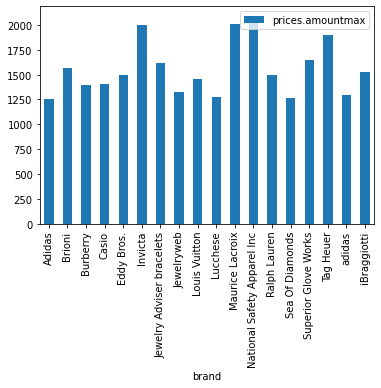

In [ ]:
#Price by brand
most_expensive = data.sort_values(by='prices.amountmax', ascending=False).head(120).tail(100)
plt.figure(figsize=(8,6), dpi=100, facecolor='w', edgecolor='k')
most_expensive[['brand','prices.amountmax']].groupby('brand').agg('max').plot(kind='bar')

In [ ]:
saledf= data['prices.issale']
saledf.head()

0     true
1    false
2    false
3    false
4    false
Name: prices.issale, dtype: object

In [ ]:
saledf.value_counts()

false    12836
true      5509
Name: prices.issale, dtype: int64

In [ ]:
# Checking the brands who sold shoes  priced over $100 
expensive=data.sort_values(by='prices.amountmax',ascending=False)
highbrand=expensive[['brand','prices.amountmax']].groupby('brand').agg(max)>100 #.filter(filter_max)
highbrand.head(20)

,prices.amountmax
brand,
1031,False
12 Step Gold,False
14k co.,True
180s,False
1883 by Wolverine,True
1901,False
20-001707000,False
29 Porter Rd,False
2Bhip,False


In [ ]:
# New column brand count . columnvalue says how many pair of shoes the brand sold
data['brand.count'] = data['brand'].map(data['brand'].value_counts())
data[['brand','brand.count']]

,brand,brand.count
0,Josmo,20
1,Josmo,20
2,SERVUS BY HONEYWELL,18
3,SERVUS BY HONEYWELL,18
4,SERVUS BY HONEYWELL,18
...,...,...
19310,"Xray, XRay",1
19311,Fila,53
19312,Seek Optics,42
19313,Seek Optics,42


In [ ]:
affordable=data.sort_values(by='prices.amountmax')
affordable=affordable[['brand','prices.amountmax']].groupby('brand').agg(min)<100 #.filter(filter_max)
affordable.head(20)

,prices.amountmax
brand,
1031,True
12 Step Gold,True
14k co.,True
180s,True
1883 by Wolverine,False
1901,True
20-001707000,True
29 Porter Rd,True
2Bhip,True


In [ ]:
# creating price band to group the prices in data. price>=30 = 0,price>30 & <=100 =1, price>100 =2
data['price_band']=0
data.loc[data['prices.amountmax']<=30,'price_band']=0
data.loc[(data['prices.amountmax']>30)&(data['prices.amountmax']<=100),'price_band']=1
data.loc[data['prices.amountmax']>100,'price_band']=2
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,AVpfHrJ6ilAPnD_xVXOI,AVpfHrJ6ilAPnD_xVXOI,AVpfHsWP1cnluZ0-eVZ7,AVpfHsWP1cnluZ0-eVZ7,AVpfHsWP1cnluZ0-eVZ7,AVpfHsWP1cnluZ0-eVZ7,AVpfHsWP1cnluZ0-eVZ7,AVpfHsWP1cnluZ0-eVZ7,AVpfHsWP1cnluZ0-eVZ7,AVpfHsWP1cnluZ0-eVZ7
brand,Josmo,Josmo,SERVUS BY HONEYWELL,SERVUS BY HONEYWELL,SERVUS BY HONEYWELL,SERVUS BY HONEYWELL,SERVUS BY HONEYWELL,SERVUS BY HONEYWELL,SERVUS BY HONEYWELL,SERVUS BY HONEYWELL
categories,"Clothing,Shoes,Men's Shoes,All Men's Shoes","Clothing,Shoes,Men's Shoes,All Men's Shoes","All Men's Shoes,Shoes,Men's Shoes,Clothing","All Men's Shoes,Shoes,Men's Shoes,Clothing","All Men's Shoes,Shoes,Men's Shoes,Clothing","All Men's Shoes,Shoes,Men's Shoes,Clothing","All Men's Shoes,Shoes,Men's Shoes,Clothing","All Men's Shoes,Shoes,Men's Shoes,Clothing","All Men's Shoes,Shoes,Men's Shoes,Clothing","All Men's Shoes,Shoes,Men's Shoes,Clothing"
colors,multicolor,multicolor,black,black,black,black,black,black,black,black
dateadded,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,2016-06-14T04:29:57Z,2016-06-14T04:29:57Z,2016-06-14T04:29:57Z,2016-06-14T04:29:57Z,2016-06-14T04:29:57Z,2016-06-14T04:29:57Z,2016-06-14T04:29:57Z,2016-06-14T04:29:57Z
dateupdated,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,2016-07-09T20:26:48Z,2016-07-09T20:26:48Z,2016-07-09T20:26:48Z,2016-07-09T20:26:48Z,2016-07-09T20:26:48Z,2016-07-09T20:26:48Z,2016-07-09T20:26:48Z,2016-07-09T20:26:48Z
merchants,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...","[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...","[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...","[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...","[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...","[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...","[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...","[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""..."
prices.amountmin,39.89,51.99,40.02,50.31,46.26,55.99,41.12,46.19,21.4,45.23
prices.amountmax,39.89,51.99,40.02,50.31,46.26,55.99,41.12,46.19,21.4,45.23
prices.condition,NaN,new,new,new,new,new,new,new,new,new


In [ ]:
# checking the value counts in price_band
data['price_band'].value_counts()

1    9135
2    5528
0    3682
Name: price_band, dtype: int64

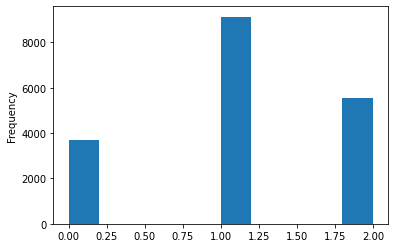

In [ ]:
# Histogram of price range( <=30 is 0, >30 and <=100 is 1 and >100 is 2)
data['price_band'].plot(kind='hist')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


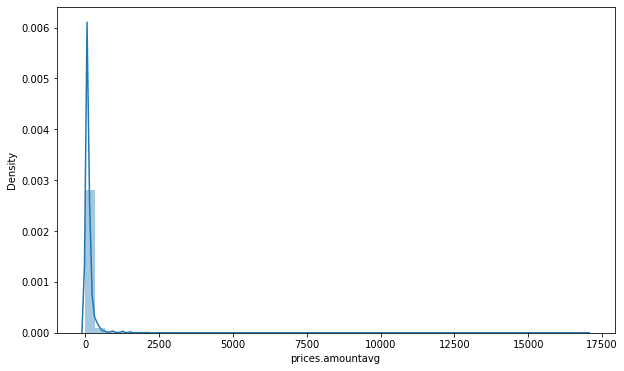

In [ ]:
# price distribution plot
plt.figure(figsize=(10,6))
sns.distplot(data['prices.amountavg'])
plt.show()

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

def plot_column_distribution(values, name):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 7))
    values_ecdf = ECDF(values)
    mapped_ecdf = values_ecdf(values)
    median = values[sorted(enumerate(mapped_ecdf), key=lambda el: np.abs(el[1] - .5))[0][0]]
    ax[0].plot(values, mapped_ecdf, color="b")
    ax[0].legend(labels=[f"{name} ECDF"], loc=4)
    ax[0].scatter(median, 0.5, color="g", s=70)
    ax[0].annotate(f"Median = {median}",
            xy=(median, 0.5),
            xytext=(50, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom')

    sns.distplot(values, ax=ax[1], color="r")
    ax[1].legend(labels=[f"{name} histogram"], loc=4)
    fig.suptitle(f"{name} distribution", size=18)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Converting the boolean values to 0,1 using .astype()
data[['price.stat']] = data[['price.stat']].astype('int')
data.dtypes

id                   object
brand                object
categories           object
colors               object
dateadded            object
dateupdated          object
merchants            object
prices.amountmin    float64
prices.amountmax    float64
prices.condition     object
prices.currency      object
prices.dateadded     object
prices.dateseen      object
prices.issale        object
prices.merchant      object
brand_clean          object
prices.amountavg    float64
price.stat            int64
brand.count           int64
price_band            int64
dtype: object

In [ ]:
data.dtypes

id                   object
brand                object
categories           object
colors               object
dateadded            object
dateupdated          object
merchants            object
prices.amountmin    float64
prices.amountmax    float64
prices.condition     object
prices.currency      object
prices.dateadded     object
prices.dateseen      object
prices.issale        object
prices.merchant      object
brand_clean          object
prices.amountavg    float64
price.stat            int64
brand.count           int64
price_band            int64
dtype: object

In [ ]:
data = data[(data['prices.issale']!='http://www.amazon.com/Jewelplus-Yellow-Solid-Chain-Necklace/dp/B00EXJ0W2U')]
data = data[(data['prices.issale']!='https://www.walmart.com/ip/Unisex-Biblical-Gown-Adult-Costume/39617223')]
data = data[(data['prices.issale']!='http://www.amazon.com/Black-Leather-Bracelet-Stainless-Closure/dp/B0189X7CDM')]

data = data[(data['prices.issale']!='http://www.walmart.com/ip/PalmBeach-Jewelry-53010-Mens-Black-Leather-Bracelet-with-Stainless-Steel-Slip-Lock-Closure/34836424')]
data = data[(data['prices.issale']!='http://www.amazon.com/Wolverine-Wellington-Steel-Pull--Boots/dp/B01CG92CP8')]
data = data[(data['prices.issale']!='http://www.amazon.com/Wolverine-Mens-Steel-Toe-Wellington-Bundle/dp/B00XK2M77Y')]

In [ ]:
saledf= data['prices.issale']
saledf.head()

0     true
1    false
2    false
3    false
4    false
Name: prices.issale, dtype: object

In [ ]:
saledf.value_counts()

false    12836
true      5509
Name: prices.issale, dtype: int64

In [ ]:
data = data.replace({'prices.issale': {'true': True, 'false': False}})

In [ ]:
data.dtypes

In [ ]:
# Converting the boolean values to 0,1 using .astype()
data[['prices.issale']] = data[['prices.issale']].astype('bool')
data.dtypes

id                   object
brand                object
colors               object
dateadded            object
dateupdated          object
merchants            object
prices.amountmin    float64
prices.amountmax    float64
prices.issale          bool
prices.merchant      object
brand_clean          object
prices.amountavg    float64
price.stat            int64
brand.count           int64
price_band            int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18345 entries, 0 to 19314
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                18345 non-null  object 
 1   brand             18345 non-null  object 
 2   colors            18345 non-null  object 
 3   dateadded         18345 non-null  object 
 4   dateupdated       18345 non-null  object 
 5   merchants         13044 non-null  object 
 6   prices.amountmin  18345 non-null  float64
 7   prices.amountmax  18345 non-null  float64
 8   prices.issale     18345 non-null  bool   
 9   prices.merchant   13222 non-null  object 
 10  brand_clean       18345 non-null  object 
 11  prices.amountavg  18345 non-null  float64
 12  price.stat        18345 non-null  int64  
 13  brand.count       18345 non-null  int64  
 14  price_band        18345 non-null  int64  
dtypes: bool(1), float64(3), int64(3), object(8)
memory usage: 2.1+ MB


In [ ]:
data.drop(['categories', 'prices.dateadded', 'prices.dateseen', 'prices.currency', 'prices.condition'], axis = 1, inplace = True)

In [ ]:
data['datetime'] = data['dateupdated'].apply(lambda x : pd.to_datetime(str(x)))

In [ ]:
data['datetime']

0       2016-11-07 00:45:12+00:00
1       2016-11-07 00:45:12+00:00
2       2016-07-09 20:26:48+00:00
3       2016-07-09 20:26:48+00:00
4       2016-07-09 20:26:48+00:00
                   ...           
19310   2016-03-04 05:54:20+00:00
19311   2016-10-05 22:23:17+00:00
19312   2016-04-05 23:07:58+00:00
19313   2016-04-05 23:07:58+00:00
19314   2016-04-05 23:07:58+00:00
Name: datetime, Length: 18345, dtype: datetime64[ns, UTC]

In [ ]:
import datetime

# this line converts the string object in Timestamp object
#data['dateupdated'] = [datetime.datetime.strptime(d, "%Y-%m-%d %H:%M") for d in data["dateupdated"]]

# extracting date from timestamp
data['Date'] = [datetime.datetime.date(d) for d in data['datetime']] 

# extracting time from timestamp
data['Time'] = [datetime.datetime.time(d) for d in data['datetime']] 

In [ ]:
import datetime

# this line converts the string object in Timestamp object
#data['datetime'] = [datetime.datetime.strptime(d, "%Y-%m-%d %S:%M:H%") for d in data["datetime"]]

# extracting date from timestamp
data['Date'] = [datetime.datetime.date(d) for d in data['datetime']] 

# extracting time from timestamp
data['Time'] = [datetime.datetime.time(d) for d in data['datetime']] 

In [ ]:
data['Date']

0        2016-11-07
1        2016-11-07
2        2016-07-09
3        2016-07-09
4        2016-07-09
            ...    
19310    2016-03-04
19311    2016-10-05
19312    2016-04-05
19313    2016-04-05
19314    2016-04-05
Name: Date, Length: 18345, dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18345 entries, 0 to 19314
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                18345 non-null  object             
 1   brand             18345 non-null  object             
 2   colors            18345 non-null  object             
 3   dateadded         18345 non-null  object             
 4   dateupdated       18345 non-null  object             
 5   merchants         13044 non-null  object             
 6   prices.amountmin  18345 non-null  float64            
 7   prices.amountmax  18345 non-null  float64            
 8   prices.issale     18345 non-null  bool               
 9   prices.merchant   13222 non-null  object             
 10  brand_clean       18345 non-null  object             
 11  prices.amountavg  18345 non-null  float64            
 12  price.stat        18345 non-null  int64              
 13  b

In [ ]:
data.drop(['dateadded', 'dateupdated', 'Time'], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18345 entries, 0 to 19314
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                18345 non-null  object             
 1   brand             18345 non-null  object             
 2   colors            18345 non-null  object             
 3   merchants         13044 non-null  object             
 4   prices.amountmin  18345 non-null  float64            
 5   prices.amountmax  18345 non-null  float64            
 6   prices.issale     18345 non-null  bool               
 7   prices.merchant   13222 non-null  object             
 8   brand_clean       18345 non-null  object             
 9   prices.amountavg  18345 non-null  float64            
 10  price.stat        18345 non-null  int64              
 11  brand.count       18345 non-null  int64              
 12  price_band        18345 non-null  int64              
 13  d

<Figure size 2000x3000 with 0 Axes>

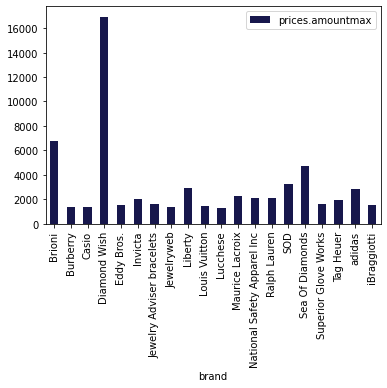

In [ ]:
#Price by brand
most_expensive = data.sort_values(by='prices.amountmax', ascending=False).head(100).tail(100)
plt.figure(figsize=(20,30), dpi=100, facecolor='w', edgecolor='k')
most_expensive[['brand','prices.amountmax']].groupby('brand').agg('max').plot(kind='bar', color=sns.color_palette('CMRmap',12))

In [ ]:
data.to_csv('clean_men_shoes_data.csv')